# Detecting Political Communities of Practice

## The US Congress


Today, we start exploring political and social community data using a popular exploration technique with association mining like clustering. It is very effective and easy to use. We will gain some real insights about US politics as well as communities in social networking sites.

Another focus today will be to introduce you to the problems of real life social datasets, which often lack the quality to be processed easily. For instance, you will learn various strategies of dealing with missing entries either by removing them completely or by trying to replicate its values. The kind of social data we are dealing with is vast and unorganized, which makes organizing it for analysis no easy task. In reality, you will spend most of your time on working through such data challenges. 

Finally, today will be dedicated to data exploration and the insights you can gain here. Exploring data is not necessarily a very structured part of your work. 

I hope you all know Python's Pandas framework. If not, you might want to check out the online documation or read a good book. Please, ask me in class.

You might remember the power of Pandas functions like head(), describe(), etc. to quickly explore essential components of data. Some people consider data exploration to be the most important part in the data analysis process, as it is really important to understand each aspect of the data and the way it is represented. In social and cultural analytics, most of our work is based on data exploration techniques rather than prediction. We will cover prediction later in the course. 

First load all the standard Pandas, etc. Python libraries, which should be familiar to you.

In [1]:
#Run the code below

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Clustering 

In this section, we concentrate on introducing the power of digital methodologies and data exploration using a particular method called clustering, which is closely related to the understanding of political and social communities. We will look at the basics of clustering that delivers you powerful results very fast. In particular, we will use the k-means algorithm, which was invented by MacQueen in the late 1960s (https://en.wikipedia.org/wiki/K-means_clustering). Despite being ancient in terms of computer lives, k-means is still widely used as it delivers good results with great performance. Performance in computing describes the effort we need in terms of computational resources. You will generally notice performance by the execution time. 

https://machinelearningmastery.com/clustering-algorithms-with-python/ provides a good overview of clustering algorithms that are implemented in Python.

Next you see the first of three presentations in this session, which introduce you to the background. Run the next cell to activate it and enjoy ... 

In [2]:
from IPython.display import Video

Video("videos/Session1.mp4")

As discussed in the video, k-means tries to develop clusters by 
(1) initialising a pre-defined number (k) of randomly chosen centroids in space. Centroids are simply the centre points of clusters. 
(2) The algorithm assigns each observation to the cluster with the closest centroid. 
(3) Based on how balanced this assignment is, the centroids are recalculated and steps 1 and 2 are repeated until the algorithm balances out. 

Let's move on to some actual work.

In a first exercise, we will use k-means to understand voting behaviour in the US senate. We selected a senate that was not too partisian as we would like to investigate changing voting behaviour.

The data is a subset of the data from https://www.dataquest.io/blog/k-means-clustering-us-senators/.

Please, run the cell below to create the congress_114 data frame, which contains the voting behaviour of 114th US Senate. According to Wikipedia (https://en.wikipedia.org/wiki/114th_United_States_Congress), the 114th Congress met in Washington, D.C. from 3 January 2015 to 3 January 2017, during the final two years of Barack Obama's presidency. 

The 2014 elections gave the Republicans control of the Senate (and control of both houses of Congress) for the first time since the 109th Congress. With 247 seats in the House of Representatives and 54 seats in the Senate, this Congress began with the largest Republican majority since the 71st Congress of 1929–1931. There are 23 Democrats, 1 Independent and 33 Republicans in our dataset. Please note that this does not represent the full 114th congress but a sample. 

In [3]:
#Run the code below

congress_114 = pd.read_csv("dataset/114_congress.csv")

To warm up check the first five entries of the dataset. It contains the name of a particular senator, his/her party and home state as well as for each bill whether the senator voted for the bill (1) or against it (0). 

In [4]:
congress_114.head(5)

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
0,0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


![title](img-videos/us-senate-voting.jpg)

Next check the last five records. 

You will see that the last record contains lots of NaN values, which stand in Python for missing values. This is the voting record of a senator who was not able to vote. In real-life datasets, you will see quite a few of these kinds of records – maybe because they never existed or they were not recorded in the first place, etc.

In [5]:
congress_114.tail(5)

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
53,53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
54,54,Leahy,D,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
55,55,Lee,R,UT,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0
56,56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
57,57,Markey,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are many strategies to deal with these kinds of missing records or 'dirty' data. Here, we will use the brute-force version and simply remove it from the data set. It is only one record and is completely missing. So, removing these records should be safe.

First check that there is really only one record by displaying all null entries in the dataset.

In [6]:
congress_114[congress_114.isnull().any(axis=1)]

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
57,57,Markey,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That's only one record missing, and the person has really not voted at all. This makes us confident that we can just delete them ...

Remove the record. The easiest is to simply remove all the records with NaN values. Pandas has a function for that, which you should know by heart.

In [7]:
congress_114 = congress_114.dropna()

Check the last 5 elements again to make sure that the observation with NaN values (of the senator who missed votes) is really gone.

In [8]:
congress_114.tail(5)

,index,name,party,state,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
52,52,Klobuchar,D,MN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
53,53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
54,54,Leahy,D,VT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
55,55,Lee,R,UT,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0
56,56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


Try to get a quick overview of the dataset and 'describe' it.

In [9]:
congress_114.describe()

,index,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.00000,57.000000,57.000000,57.000000
mean,28.000000,0.263158,0.614035,0.561404,0.947368,0.578947,0.385965,0.578947,1.0,0.543860,0.578947,0.368421,0.45614,0.526316,0.438596,0.315789
std,16.598193,0.434097,0.491150,0.500626,0.225282,0.498117,0.491150,0.498117,0.0,0.493536,0.479857,0.486664,0.50250,0.503745,0.500626,0.468961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,42.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


This has not produced very useful outputs. Check the column types to undestand why ...

In [10]:
congress_114.dtypes

index              int64
        name      object
 party            object
 state            object
bill-1           float64
bill-4           float64
bill-5           float64
bill-6           float64
bill-7           float64
bill-8           float64
bill-9           float64
bill-10          float64
bill-20          float64
bill-26          float64
bill-32          float64
bill-38          float64
bill-39          float64
bill-44          float64
bill-47          float64
dtype: object

Finally, check how many democrats, republicans and independents there are in congress_114. As you can see this is only a subset of the 100 senators. 

In [11]:
congress_114.iloc[:,2].value_counts()

     R     33
     D     23
     I      1
Name:  party , dtype: int64

We want to improve the content of the dataframe next and make the types fit better. To this end, we change the float types to integers. 

This is actually quite hard work in things like Pandas. You need to first select the right columns in the data frame. You could just count the column numbers, as it is a very small data frame. But there is a trick to find the indexes automatically. We match the beginnings of the column names and are only interested in those that start with "bill-". 

Check first the names of the columns to verify that there is a pattern you can exploit.

In [12]:
congress_114.columns

Index(['index ', '        name ', ' party ', ' state ', 'bill-1', 'bill-4',
       'bill-5', 'bill-6', 'bill-7', 'bill-8', 'bill-9', 'bill-10', 'bill-20',
       'bill-26', 'bill-32', 'bill-38', 'bill-39', 'bill-44', 'bill-47'],
      dtype='object')

Next, find a string function to select only the 'bills-' columns. Assign them to bill_cols.

In [13]:
bill_cols = congress_114.columns.str.startswith("bill-")

bill_cols

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

With the Pandas loc function and bill_cols, you can select all the bill columns. Make them all integer columns with astype(int). 

In [14]:
congress_114.loc[:, bill_cols] = congress_114.loc[:, bill_cols].astype(int)

Check that everything has come out as planned by running dtypes. 

BTW, string types are objects in Pandas ...

In [15]:
congress_114.dtypes

index             int64
        name     object
 party           object
 state           object
bill-1            int64
bill-4            int64
bill-5            int64
bill-6            int64
bill-7            int64
bill-8            int64
bill-9            int64
bill-10           int64
bill-20           int64
bill-26           int64
bill-32           int64
bill-38           int64
bill-39           int64
bill-44           int64
bill-47           int64
dtype: object

## Clustering with K-means

Many of the decisions in analytics are more an art than a science. We need to often estimate many parameters – either based on previous experience or using background knowledge. K-means is famous for heavily depending on k or the number of clusters we want to assign. We need to tell Python which k to use. 

In order to find a good starting point for k, we can use our own knowledge about how the US senate is structured. We would like to investigate voting clusters, and we know that the US senate is dominated by 2 major parties. So, it seems like a good idea to start with two clusters (k = 2), as we can assume that there should be two major party-based voting clusters. Please, assign k = 2.

In [16]:
#Run the code below

k = 2

Next, we need to understand what we would like to cluster and choose the relevant features as input into the k-means algorithm. If you look back into your earlier explorations of the dataset, you can see that the first 4 columns do not contain voting behaviour. They have the name, state, etc. of the various senators. The voting behaviour can be found in columns 5 to 19. Use either the column indexes or bill_cols to create a new dataframe congress_114_voting, which only contains the voting behaviour.

In [17]:
congress_114_voting = congress_114.loc[:, bill_cols]

congress_114_voting.head()

,bill-1,bill-4,bill-5,bill-6,bill-7,bill-8,bill-9,bill-10,bill-20,bill-26,bill-32,bill-38,bill-39,bill-44,bill-47
0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,1,0,1,0,1,0,0,1,1,0,1,1
3,0,1,1,1,1,0,1,1,1,1,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0


Great, we are ready to cluster the votes. Check out the details of k-means in the SKlearn documentation. 

Its main arguments are the dataset to cluster and the number of clusters. We can leave all the other inputs at their defaults. 

First import KMeans from sklearn.cluster.

In [18]:
#Run the code below

from sklearn.cluster import KMeans

Now, run KMeans and fit it with n_clusters  = k. Check the documentation ...

In [19]:
kmeans = KMeans(n_clusters  = k) 
kmeans.fit(congress_114_voting)

KMeans(n_clusters=2)

This should not have taken too long, as the dataset is very small. 

In the meantime, you can celebrate that you have just run a machine learning algorithm. k-means is a fairly simply one, but still a standard example of an unsupervised machine learning algorithm. Unsupervised machine learning means that you do not have to train the computer in advance about the kind of results you expect. You can also check out what that means in a wonderful Coursera/Stanford course under https://www.coursera.org/learn/machine-learning/lecture/olRZo/unsupervised-learning. The course is legendary and gives you in-depth knowledge of machine learning. 

Check why this was so quick by printing the number of iterations required to converge. Check the documentation ...

In [20]:
# The number of iterations required to converge
kmeans.n_iter_

2

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels.

In [21]:
#Run the code below

kmeans.labels_[:5]

array([1, 1, 0, 1, 0], dtype=int32)

Ok, so now that we have run our first machine learning algorithms, what do we do with the results? A good first step for k-means and other clustering algorithms is to check out the size of the clusters. Who do you expect to belong to each cluster?

Use np.bincount with kmeans.labels_, please.

In [22]:
np.bincount(kmeans.labels_)

array([22, 35])

These numbers show that there is not really a clear division between Republicans and Democrats, as the clusters do not correspond to the numbers each party has in the senate. 

Create a new dataframe congress_114_result, which contains the first 4 columns of congress_114 as well as the cluster assignments for each senator by kmeans.

Take a moment to reflect what we gain from such a new dataframe?

In [23]:
congress_114_result = congress_114.loc[:, np.logical_not(congress_114.columns.str.startswith('bill-'))].copy()
congress_114_result["cluster"] = pd.Series(kmeans.labels_)

Because we like it tidy, we give the columns of congress_114_result new readable names. Remember that we can do this by assigning the columns directly to a list of names.

In [24]:
#Run the code below

congress_114_result.columns = ['index','name','party', 'state', 'cluster']

Let's take a look at the composition of  congress_114_result. This time we want to take a look at the whole congress_114_result. What do you see?

In [25]:
congress_114_result

,index,name,party,state,cluster
0,0,Alexander,R,TN,1
1,1,Ayotte,R,NH,1
2,2,Baldwin,D,WI,0
3,3,Barrasso,R,WY,1
4,4,Bennet,D,CO,0
5,5,Blumenthal,D,CT,0
6,6,Blunt,R,MO,1
7,7,Booker,D,NJ,0
8,8,Boozman,R,AR,1
9,9,Boxer,D,CA,0


Finally, let's take a look at the composition of our 2 clusters. 

In this case, we want to count how often a Democrat appears in cluster 1 or how often in cluster 2; similarly, how often is a Republican part of either cluster 1 or 2. Please note that there are also Independent senators. 

In order to compare party and cluster features, use pd.crosstab. Remember that with the crosstab function we can count the frequency of the combination of two columns. 

In [26]:
pd.crosstab(congress_114_result.party, congress_114_result.cluster)

cluster,0,1
party,,
D,21,2
I,1,0
R,0,33


Take a minute to interpret the results. Which party is more coherent in its voting behaviour? Can you identify the outliers by looking through the result data frame? 

k = 2 seems to have been a fairly good choice as there is a lot of overlap between parties and voting clusters. 

Let’s try k = 5 next to get more diversified results with 5 clusters. 

In [27]:
#Run the code below

k = 5

Fit Kmeans with the new k. Assign it to kmeans_5.

In [28]:
kmeans_5 = KMeans(n_clusters  = k) 
kmeans_5.fit(congress_114_voting)

KMeans(n_clusters=5)

As we already have a congress_114_result data frame, we just need to create a new column in it with the new data. Create a new column cluster_5.

In [29]:
congress_114_result["cluster_5"] = pd.Series(kmeans_5.labels_)

Let's run congress_114_result to check the results.

In [30]:
congress_114_result

,index,name,party,state,cluster,cluster_5
0,0,Alexander,R,TN,1,0
1,1,Ayotte,R,NH,1,3
2,2,Baldwin,D,WI,0,1
3,3,Barrasso,R,WY,1,0
4,4,Bennet,D,CO,0,2
5,5,Blumenthal,D,CT,0,1
6,6,Blunt,R,MO,1,0
7,7,Booker,D,NJ,0,1
8,8,Boozman,R,AR,1,0
9,9,Boxer,D,CA,0,2


Now, let’s compare voting behaviour and parties again with crosstab.

In [31]:
pd.crosstab(congress_114_result.party, congress_114_result.cluster_5)

cluster_5,0,1,2,3,4
party,,,,,
D,0,14,6,0,3
I,0,0,1,0,0
R,31,0,0,2,0


There is a strange outlier in the clusters with regard to voting behaviour of particular Republicans. Let’s investigate those Republicans who appear not to vote with the rest of their party or other Democrats. 

The cluster number will change depending on the result of your k-means. So, anything between 1 and 5. You get this number from the table you have just printed out. Use it to filter congress_114_result and retrieve the names and states of the senators. 

In [32]:
clusters_of_interest = [2]

congress_114_result.loc[congress_114_result['cluster_5'].isin(clusters_of_interest), ['name', 'state']]

,name,state
4,Bennet,CO
9,Boxer,CA
15,Carper,DE
16,Casey,PA
41,Heinrich,NM
50,King,ME
52,Klobuchar,MN


### Visualisation

Finally we want to also visualise the cluster assignment to present how senators are close to each other in 2-dimensional coordinate system.

Create a simple visualisation that maps the 5 clusters in 2 dimensions and colour the points that represent the senators according to their 5 kmeans clusters.

Tip: You need the principal component analysis trick to map congress_114_voting into 2 dimensions.

First load PCA from sklearn.

In [33]:
from sklearn.decomposition import PCA

Now apply a PCA with two components. 

Then, create a new dataframe principal_df with the results of this analysis and name the two columns PC_1 and PC2.

Finally, add the columns name, party, cluster and cluster_5 to principal_df

In [34]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(congress_114_voting)

principal_df = pd.DataFrame(data = principal_components, columns = ['PC_1', 'PC_2'])

principal_df['name'] = congress_114_result.name
principal_df['party'] = congress_114_result.party
principal_df['cluster'] = congress_114_result.cluster
principal_df['cluster_5'] = congress_114_result.cluster_5

Run the code below to visualise. Do you understand what it is doing?

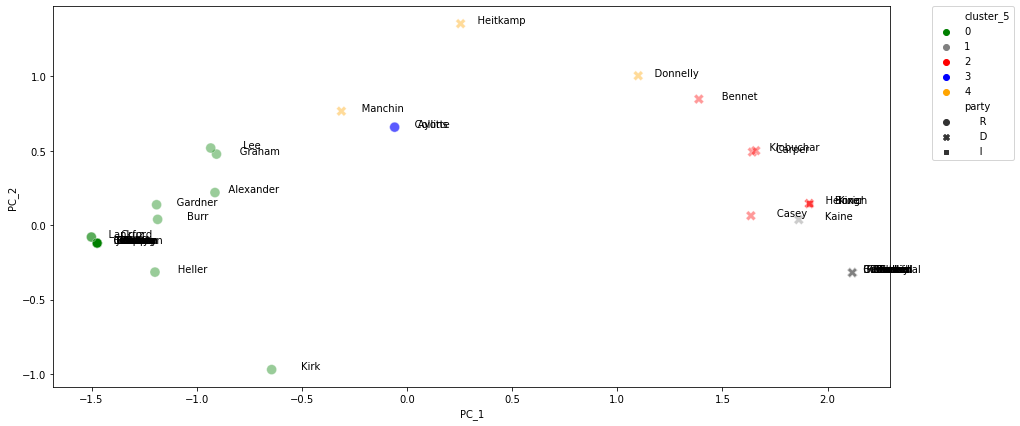

In [35]:
#Run the code below
#based on https://honingds.com/blog/seaborn-scatterplot/

import seaborn as sns
plt.figure(figsize=(15,7))

sns.scatterplot(data = principal_df, x='PC_1', y='PC_2', hue='cluster_5', 
                style='party', s=100, palette=['green','grey','red','blue','orange'], alpha=.40)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(principal_df.PC_1, principal_df.PC_2, principal_df.name, plt.gca()) 


Take some time now and investigate which senators are the outliers are by researching them online. WIkipedia is enough. Can you understand why they are clusters by themselves? 

### Determine the optimal number of parties in the Senate according to K-means

So what would be the optimal number of parties in the senate? In terms of k-means, we need to determine the optimal k. There are quite a few methods to estimate k. Among the best known is the elbow method that is based on visualing trials with several k's.

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster 'Sum of Squared Errors' (SSE; also called 'distortion') will decrease. 

The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k.

To perform the elbow method, run several k-means, increment k with each iteration until you reach max_k = 10, and record the SSE score in a list called sse. Then, map the SSE for each iteration to find the point for curve bends, the elbow. This will be the best k.

In [36]:
max_k = 10
sse = []

for k in range(1, max_k):
    kmeans_ = KMeans(n_clusters = k)
    kmeans_.fit(congress_114_voting)
    sse.append(kmeans_.inertia_)

Run the code below to visualise the elbow ...

<AxesSubplot:xlabel='Number of Clusters', ylabel='SSE'>

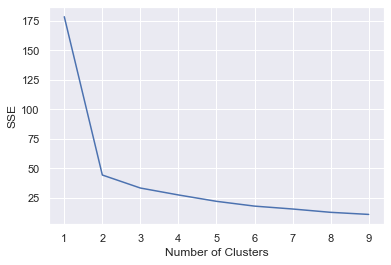

In [37]:
#Run the code below

sns.set(style='darkgrid')

elbow_df  = pd.DataFrame(list(zip(range(1, max_k), sse)),
              columns = ['Number of Clusters', 'SSE'])


sns.lineplot(x = 'Number of Clusters', y = 'SSE', data = elbow_df)

As you can see 2 is already the best answer ...

You can now continue playing with different k values if you want. 

Before we move on to the world of teens, please finally consider https://www.r-bloggers.com/k-means-clustering-is-not-a-free-lunch/. The article describes that, while clustering (and other machine learning algorithms) can produce very persuasive results, these do not come for free. They are no free lunch. The results always depend on the assumptions we put in such as the number of clusters in k-means but also how we describe the vote in Congress, how we measure somebody’s influence, etc. This is the famous 'No Free Lunch Theorem' in Machine Learning. 